<a href="https://colab.research.google.com/github/nicolaciar/numerico1-famaf/blob/main/Practicos/Practico4_ANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 4 - Análisis Numérico I - FaMAF (2024)
>## Aproximación de Funciones
Teoría de cuadrados mínimos. Caso discreto y caso continuo. Ecuaciones normales.
Polinomios ortogonales.

## Ejercicio 1

Obtener el polinomio que mejor aproxima en el sentido de cuadrados mínimos del grado indicado en cada caso:

* a) polinomio de grado $1$, para la siguiente tabla de datos:



\begin{array} {|r|r|r|r|r|r|r|r|r|r|r|r|}
  \hline x & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\
  \hline y & -0.1 & 1.1 & 1.9 & 3.2 & 3.8 & 5.0 & 6.0 & 7.3 & 8.1 & 8.9 \\
  \hline
\end{array}

* b) polinomio de grado $2$, para la siguiente tabla de datos:

\begin{array} {|r|r|r|r|r|r|}
  \hline x & -1 & 0 & 1 & 3 & 6  \\
  \hline y & 6.1 & 2.8 & 2.2 & 6 & 26.9 \\
  \hline
  \end{array}



---



**(a)** Un polinomio de grado $1$ es una recta, con lo cual se nos pide la mejor recta que aproxime los puntos en el sentido de cuadrados mínimos.

Esto último significa que el error relacionado a la aproximación  es la suma de los cuadrados de las diferencias entre los valores $y$, en la recta de aproximación $y=a_0x_i+a_0$ y los valores $y_i$ proporcionados. Por lo tanto debemos encontrar constantes $a_0$ y $a_1$, que minimizan el error de mínimos cuadrados:

$$
E_2(a_0,a_1)=\sum_{i=1}^{10}[y_i-(a_1x_i+a_0)]^2
$$

Del teórico de la materia, sabemos que:

$$
a_0=\frac{\displaystyle\sum_{i=1}^{10}x_i^2\sum_{i=1}^{10}y_i-\sum_{i=1}^{10}x_iy_i\sum_{i=1}^{10}x_i}{10\left(\displaystyle\sum_{i=1}^{10}x_i^2\right)-\left(\displaystyle\sum_{i=1}^{10}x_i\right)^2}
$$

y

$$
a_1=\frac{10\displaystyle\sum_{i=1}^{10}x_iy_i-\sum_{i=1}^{10}x_i\sum_{i=1}^{10}y_i}{10\left(\displaystyle\sum_{i=1}^{10}x_i^2\right)-\left(\displaystyle\sum_{i=1}^{10}x_i\right)^2}
$$

Donde:

\begin{align*}
\sum_{i=1}^{10}x_i^2&=\sum_{i=1}^9i^2\\
&=\frac{9(9+1)(2⋅9+1)}{6}\\
&=285
\end{align*}

\begin{align*}
\sum_{i=1}^{10}y_i&=-0.1 + 1.1 + 1.9 + 3.2 + 3.8 + 5.0 + 6.0 + 7.3 + 8.1 + 8.9\\
&=45.2
\end{align*}

\begin{align*}
\sum_{i=1}^{10}x_i&= \sum_{i=1}^{9}i\\
&=\frac{9(9+1)}{2}\\
&=45
\end{align*}

\begin{align*}
\sum_{i=1}^{10}x_iy_i=…=286.7
\end{align*}



Con lo cual:


\begin{align*}
a_0&=\frac{285⋅(45.2)-(286.7)\cdot 45}{10⋅285-45^2}
\\
&\approx -0.02363\\
\end{align*}


\begin{align*}
a_1&=\frac{10⋅286.7-45⋅45.2\cdot 45}{10⋅285-45^2}
\\
&=\frac{833}{825}\\
&≈ 1.00969
\end{align*}



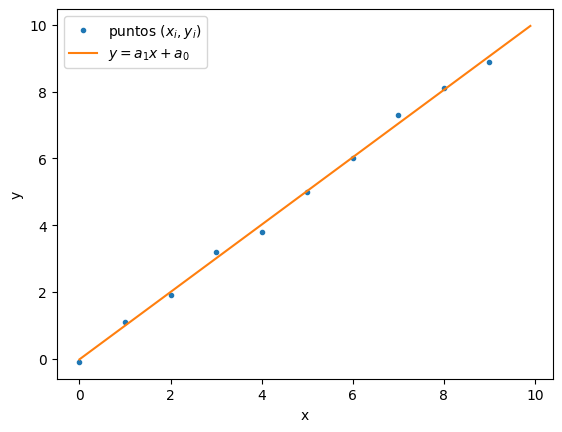

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
y_i=[-0.1 , 1.1 , 1.9 , 3.2 , 3.8 , 5.0 , 6.0 , 7.3, 8.1, 8.9]
x_i=[n for n in range (0,10)]
a_0=-0.02363
a_1=833/825
x_s=np.arange(0,10,0.1)

plt.figure()
plt.plot(x_i,y_i,'.', label="puntos $(x_i,y_i)$")
plt.plot(x_s, a_1*x_s+a_0, label='$y=a_1x+a_0$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



---



**(b)** El problema general de aproximar un conjunto de datos $\{(x_i,y_i:i=1,2,\dots,m)\}$ con un polinomio algebraico

$$
P_n(x)=a_nx^n+a_{n-1}x^{n-1}+…+a_1x+a_0
$$

de grado $n<m-1$, por medio del procedimiento de mínimos cuadrados se maneja de forma similar. Seleccionamos consantes $a_0,a_1,\dots,a_n$ para minimizar el error de mínimos cuadrados $E=E_2(a_0,a_1,…,a_n)$ donde

\begin{align*}
E=\sum_{i=1}^m(y_i-P_n(x_i))^2
\end{align*}

Minimizando estas ecuaciones (con el procedimiento de hacer las derivadas parciales iguales a $0$) nos devuelve $n+1$ **ecuaciones normales** con las $n+1$ incognitas $a_j$:

$$\tag{para $j=1,2,\dots,n$}
\sum_{i=0}^na_i\sum_{i=1}^mx_i^{j+k}=\sum_{i=1}^my_ix_i^j
$$

En nuestro caso $m=5$ y $n=2$, es decir, buscamos constantes $a_0,a_1$ y $a_2$ tales que minimicen el error al aproximar los puntos por el polinomio:

$$
P_2=a_2x^2+a_1x+a_0
$$

tenemos:

\begin{align*}
a_0\sum_{i=0}^5x_i^0+a_1\sum_{i=1}^5x_i^1+a_2\sum_{i=1}^5x_i^2=\sum_{i=1}^5y_ix_i^0\\
a_0\sum_{i=0}^5x_i^1+a_1\sum_{i=1}^5x_i^2+a_2\sum_{i=1}^5x_i^3=\sum_{i=1}^5y_ix_i^1\\
a_0\sum_{i=0}^5x_i^2+a_1\sum_{i=1}^5x_i^3+a_2\sum_{i=1}^5x_i^4=\sum_{i=1}^5y_ix_i^2
\end{align*}



Donde

$$
\sum_{i=1}^5x_i=9\hspace{1cm}\sum_{i=1}^5x_i^2=47\\
\sum_{i=1}^5x_i^3=243\hspace{1cm}\sum_{i=1}^5x_i^4=1377
$$

$$
\sum_{i=1}^5y_i=44\hspace{1cm}\sum_{i=1}^5y_ix_i=175.5\hspace{1cm}\sum_{i=1}^5y_ix_i^2=1030.7
$$

Nos quede un sistema lineal:

\begin{align*}
a_0\cdot5+a_1\cdot 9+a_2\cdot47&=44\\
a_0⋅ 9+a_147+a_2\cdot243&=175.5\\
a_0\cdot47+a_1\cdot243+a_2\cdot1377&=1030.7
\end{align*}

Podemos resolverlo por alguno de los métodos de algebra lineal (como el método de Gauss-Jordan) o para así obtener:

\begin{align*}
a_0&=3.03\\
a_1&=-1.98\\
a_2&=0.99
\end{align*}

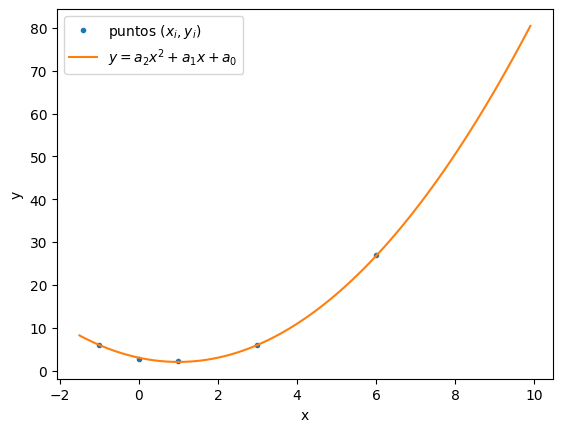

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np

x_i=[-1,0,1,3,6]
y_i=[6.1,2.8,2.2,6,26.9]

a_0=3.03
a_1=-1.98
a_2=0.99
x_s=np.arange(-1.5,10,0.1)

plt.figure()
plt.plot(x_i,y_i,'.', label="puntos $(x_i,y_i)$")
plt.plot(x_s, a_2*(x_s**2)+a_1*x_s+a_0, label='$y=a_2x^2+a_1x+a_0$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Ejercicio 2

Probar que si se tienen $n + 1$ puntos distintos, la mejor aproximación polinomial (en el sentido de cuadrados mı́nimos) de grado $n$ coincide con el polinomio interpolante.

Sea $n+1$ puntos distintos y sean $Q_n(x)$ y $P_n(x)$ el polinomio que mejor aproxima a dichos puntos en el sentido de cuadrados mínimos de grado $n$ y el polinomio interpolante de grado $n$, respectivamente.

Entonces, tenemos que $Q(x)$ es aquel polinomio el cual minimiza el error:

$$
E(a_0,\dots,a_n)=\sum_{i=0}^n(y_i-Q_n(x_i))^2\geq 0
$$

Donde:

$$
Q_n(x)=a_0+a_1x+\dots+ a_nx^n
$$

Observemos que si $Q_n(x)=P_n(x)$ entonces $y_i=P_n(x_i)$ para todo $x_i:1,\dots,n+1$, pues dicho polinomio interpola los $n+1$ puntos. Esto implica que:

$$
E(a_0,\dots,a_n)=\sum_{i=0}^n(y_i-P_n(x_i))^2=\sum_{i=0}^n(y_i-y_i)^2=0
$$

Ahora, si $Q_n\neq P_n$ entonces $y_i\neq Q_n(x_i)$ para al menos un $i$, lo cual implica:

$$
E(a_0,\dots,a_n)=\sum_{i=0}^n(y_i-Q_n(x_i))^2 >0
$$

Pero $Q_n$ **minimiza** el valor de $E$ y ya vimos que $P_n$ nos da un error de $0$, con lo cual $Q_n$ debe coincidir con $P_n$.

## Ejercicio 3

Hallar el polinomio de grado cero que mejor aproxime en el sentido de cuadrados mı́nimos a una función $f : [a, b] → \mathbb{R}$ en $n$ puntos $x_1 , . . . , x_n$ del intervalo $[a, b]$.

Sean $x_1,…,x_n$, para $n∈\mathbb{N}$, puntos en un intervalo $[a,b]$. Para dichos valores tenemos asociados $y_1,…,y_n$ tales que $y_i=f(x_i)$.

Tenemos entonces $n$ puntos y queremos aproximarlos por un polinomio de grado $m=0$:

$$
P_0=a_0
$$

Donde $P_0$ minimiza:

$$
E(a_0)=\sum_{i=1}^{n}(y_i-a_0)^2
$$

Siguiendo el procedimiento general, pedimos que se cumpla:

\begin{align*}
0=\frac{\partial E}{∂_0}=-2\sum_{i=1}^n(y_i-a_0)&⇔\sum_{i=1}^n(y_i-a_0)=0\\
&⇔\sum_{i=1}^ny_i=\sum_{i=0}^na_0\\
&⇔n\cdot a_0=\sum_{i=1}^ny_i\\
&⇔a_0=\frac{\displaystyle\sum_{i=0}^ny_i}{n}\\
&⇔ a_0=\frac{\displaystyle\sum_{i=0}^nf(x_i)}{n}
\end{align*}

Con lo cual,


$$
P_0=a_0=\frac{\displaystyle\sum_{i=0}^nf(x_i)}{n}
$$

## Ejercicio 4

 Aproximar los datos de la siguiente tabla con un modelo de la forma $f(x)\sim ae^{bx}$ en el sentido de cuadrados mínimos.

\begin{array} {|r|r|r|r|r|r|}
\hline x & -1 & 0 & 1 & 2   \\
\hline y & 8.1 & 3 & 1.1 & 0.5  \\
\hline
\end{array}

Se nos pide proponer un modelo exponencial $y=ae^{bx}$ para aproximar los puntos $(x_i,y_i)$, $i=1,…4$. Si aplicamos el logaritmo natural:

\begin{align*}
y=ae^{bx}⇔\ln y=\ln a+bx⇔\overline{y}=\overline{a}+bx
\end{align*}

de esta manera es posible usar un modelo **lineal**, $\overline{a}$ y $b$ son constantes a determinar.

Antes de aplicar las fórmulas de cuadrados mínimos para el modelo lineal conviene reescribir la tabla anterior:



\begin{array} {|r|r|r|r|r|r|}
\hline x & -1 & 0 & 1 & 2   \\
\hline \overline{y} & 2.092 & 1.099 & 0.095 & -0.693  \\
\hline
\end{array}

Aplicando las fórmulas de cuadrados mínimos:

$$
\overline{a}=\frac{\displaystyle\sum_{i=1}^{4}x_i^2\sum_{i=1}^{4}\overline{y}_i-\sum_{i=1}^{4}x_i\overline{y}_i\sum_{i=1}^{4}x_i}{4\left(\displaystyle\sum_{i=1}^{4}x_i^2\right)-\left(\displaystyle\sum_{i=1}^{4}x_i\right)^2}
$$

y

$$
b=\frac{4\displaystyle\sum_{i=1}^{4}x_i\overline{y}_i-\sum_{i=1}^{4}x_i\sum_{i=1}^{4}\overline{y}_i}{4\left(\displaystyle\sum_{i=1}^{4}x_i^2\right)-\left(\displaystyle\sum_{i=1}^{4}x_i\right)^2}
$$

Realizando las cuentas se llega a

\begin{align*}
\overline{a}&=1.116\\
b&=-0.93
\end{align*}

Observemos que

\begin{align*}
\ln a=\overline{a}⇔a=e^\overline{a}
\end{align*}

Con lo cual nuestro modelo queda determinado:



$$
y=ae^{bx}=e^{\overline{a}+bx}=e^{1.116-0.93x}
$$

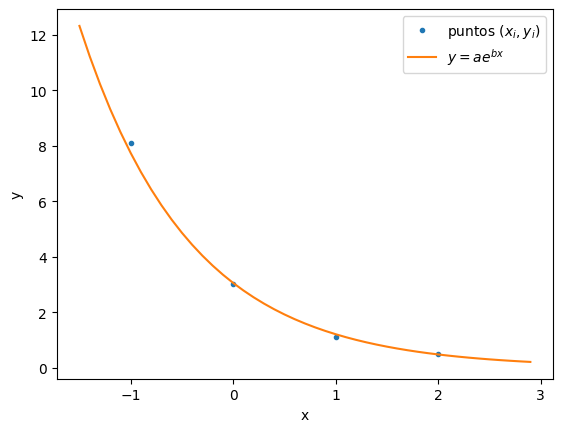

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
from math import e
y_i=[8.1,3,1.1,0.5]
x_i=[-1,0,1,2]
b=-0.93
a=1.116
x_s=np.arange(-1.5,3,0.1)

plt.figure()
plt.plot(x_i,y_i,'.', label="puntos $(x_i,y_i)$")
plt.plot(x_s, e**(a+b*x_s), label='$y=ae^{bx}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Ejercicio 5

Aproximar los datos de la siguiente tabla con un modelo de la forma $f (x) \sim -e^{ax^2+bx+c}$ en el sentido de cuadrados mı́nimos.


\begin{array} {|r|r|r|r|r|r|}
\hline x & -1 & 0 & 1 & 2   \\
\hline y & -1.1 & -0.4 & -0.9 & -0.5  \\
\hline
\end{array}

Al igual que en el ejercicio anterior, aplicamos logaritmo natural y tenemos:

\begin{align*}
y=-e^{ax^2+bx+c}&⇔-y=e^{ax^2+bx+c}\\
&⇔\ln(-y)=\ln\left(e^{ax^2+bx+c}\right)\\
&⇔\overline{y}=ax^2+bx+c
\end{align*}

la situación es análoga a la del ejercicio $1\,b)$, queremos encontrar las constantes $a,b$ y $c$ del polinomio de grado $2$:

$$
P(x)=ax^2+bx+c
$$

que minimiza el error

$$
E(a,b,c)=\sum_{i=1}^n(y_i-P(x_i))^2
$$



Teniendo en cuanta que $\overline{y}=\ln(-y)$ reescribimos la tabla de datos:

\begin{array} {|r|r|r|r|r|r|}
\hline x & -1 & 0 & 1 & 2   \\
\hline y & 0.095 & -0.916 & -0.105 & -0.693  \\
\hline
\end{array}

Las ecuaciones normales son:



\begin{align*}
c\sum_{i=0}^4x_i^0+b\sum_{i=1}^4x_i^1+a\sum_{i=1}^4x_i^2=\sum_{i=1}^4y_ix_i^0\\
c\sum_{i=0}^4x_i^1+b\sum_{i=1}^4x_i^2+a\sum_{i=1}^4x_i^3=\sum_{i=1}^4y_ix_i^1\\
c\sum_{i=0}^4x_i^2+b\sum_{i=1}^4x_i^3+a\sum_{i=1}^4x_i^4=\sum_{i=1}^4y_ix_i^2
\end{align*}

Donde:

\begin{align*}
\sum_{i=1}^4x_i&=2\hspace{1cm}\sum_{i=1}^4x_i^2=6\\
\sum_{i=1}^4x_i^3&=8\hspace{1cm}\sum_{i=1}^4x_i^4=18
\end{align*}

\begin{align*}
\sum_{i=1}^4y_i=-1.619\hspace{1cm}\sum_{i=1}^4y_ix_i=-1.586\hspace{1cm}\sum_{i=1}^4y_ix_i^2=-2.782
\end{align*}

De donde obtenemos el sistema equivalente al producto de matrices:


\begin{align*}
\begin{pmatrix}
4 & 2 & 6\\
2 & 6 & 8\\
6 & 8 & 18
\end{pmatrix}
\begin{pmatrix}
c \\ b \\ a
\end{pmatrix}=
\begin{pmatrix}
-1.619 \\ -1.586 \\ -2.782
\end{pmatrix}
\end{align*}

Podemos resolver este sistema por cualquier método conocido (como Gauss-Jordan), en nuestro caso usamos Python:



In [ ]:
# @title
import numpy as np

# Coeficientes de la matriz (A)
A = np.array([[4, 2, 6],
              [2, 6, 8],
              [6, 8, 18]])

# Vector de términos independientes (b)
b = np.array([-1.619, -1.586, -2.7812])

# Resolver el sistema de ecuaciones
x = np.linalg.solve(A, b)

print("Solución del sistema:", x)


Solución del sistema: [-0.43305 -0.26125  0.10595]


Con lo cual:

\begin{align*}
c &= -0.433\\
b &= -0.261\\
a &= 0.106
\end{align*}

Y nuestro modelo queda:

$$
y=-e^{ax^2+bx+c}=-e^{0.106x^2+-0.261x-0.433}
$$

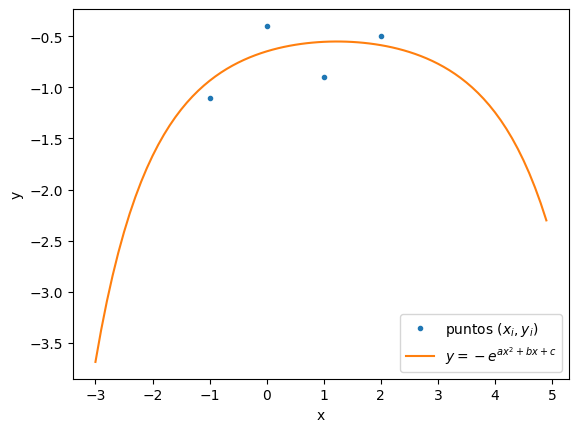

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
from math import e
xi = [-1,0,1,2]
yi = [-1.1,-0.4, -0.9, -0.5]

c = -0.433
b = -0.261
a = 0.106
x_s=np.arange(-3,5,0.1)

plt.figure()
plt.plot(xi,yi,'.', label="puntos $(x_i,y_i)$")
plt.plot(x_s, (-1)*(e**(a*(x_s**2)+b*x_s+c)), label='$y=-e^{ax^2+bx+c}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Ejercicio 6

Suponer que se realizó un experimento para encontrar la constante de elasticidad $k$ de la Ley de Hooke: $F = k(l - 5.3)$. La función $F$ es la fuerza requerida para estirar el resorte $l$ unidades.

* a) Se midieron las fuerzas $F(l)$ para distintas longitudes $l$ y se obtuvo la siguiente tabla:

    \begin{array} {|r|r|r|r|r|r|}
    \hline l & 7 & 9.4 & 12.3 \\
    \hline F & 2 & 4 & 5  \\
    \hline
    \end{array}  

    Encontrar la mejor aproximación en el sentido de los cuadrados mínimos para $k$.


* b) Realizando más mediciones se obtuvieron nuevos datos

    \begin{array} {|r|r|r|r|r|r|}
    \hline l & 8.3 & 11.3 & 14.4 & 15.9\\
    \hline F & 3 & 5 & 8 & 10 \\
    \hline
    \end{array}

    Calcular la nueva aproximación para $k$ sólo con el segundo grupo de valores.


* c) ¿Cuál valor de $k$ aproxima mejor utilizando los datos de todas las mediciones?



---



**(a)** La ecuación que queremos aproximar es:

$$
F=kx
$$

Con $x=l-5.3$. Reescribimos entonces los datos en término de $x$:



\begin{array} {|r|r|r|r|r|r|}
\hline x & 1.7 & 4.1 & 7 \\
\hline F & 2 & 4 & 5  \\
\hline
\end{array}  

Queremos encontrar laa constante $k$ que minimiza el error en el sentido de los cuadrados mínimos:

$$
E(k)=\sum_{i=1}^n(F_i-kx_i)^2
$$

Derivando respecto a $k$ e igualando a cero obtenemos un máximo;

\begin{align*}
\frac{dE}{dk}=2\sum_{i=1}^n(F_i-kx_i)x_i=0&⇔\sum_{i=1}^nx_iF_i-\sum_{i=1}^nkx_i^2=0\\
&⇔\sum_{i=1}^nx_iF_i=k\sum_{i=1}^nx_i^2\\\tag{6}
&⇔k=\frac{\displaystyle\sum_{i=1}^nx_iF_i}{\displaystyle\sum_{i=1}^nx_i^2}
\end{align*}



Con 3 puntos $x_i$ tenemos:

\begin{align*}
\sum_{i=1}^3x_i^2&=68.7&\sum_{i=1}^3x_iF_i&=54.8
\end{align*}

Con lo cual:

\begin{align*}
k&=\frac{54.8}{68.7}≈0.798
\end{align*}


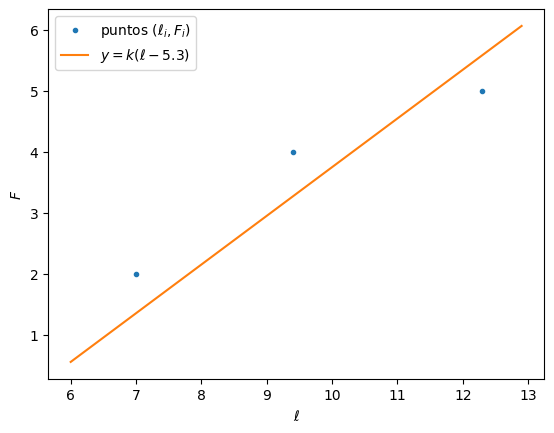

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
F_i=[2,4,5]
l_i=[7,9.4,12.3]
k = 0.798
x_s=np.arange(6,13,0.1)

plt.figure()
plt.plot(l_i,F_i,'.', label="puntos $(\ell_i,F_i)$")
plt.plot(x_s, k*(x_s-5.3), label='$y=k(\ell-5.3)$')
plt.xlabel('$\ell$')
plt.ylabel('$F$')
plt.legend()
plt.show()



---



**(b)** Con el segundo grupo de 4 valores, primero los reescribimos en términos de $x$,

\begin{array} {|r|r|r|r|r|r|}
\hline x & 3 & 6 & 9.1 & 10.6\\
\hline F & 3 & 5 & 8 & 10 \\
\hline
\end{array}

utilizando $(6)$ y siendo:

\begin{align*}
\sum_{i=1}^4x_i^2&=240.17&\sum_{i=1}^4x_iF_i&=217.8
\end{align*}

tenemos:

$$
k=\frac{217.8}{240.17}=0.907
$$

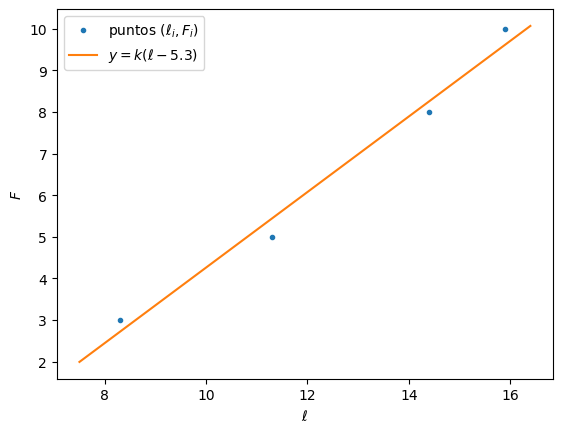

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
F_i=[3,5,8,10]
l_i=[8.3, 11.3,14.4,15.9]
k = 0.907
x_s=np.arange(7.5,16.5,0.1)

plt.figure()
plt.plot(l_i,F_i,'.', label="puntos $(\ell_i,F_i)$")
plt.plot(x_s, k*(x_s-5.3), label='$y=k(\ell-5.3)$')
plt.xlabel('$\ell$')
plt.ylabel('$F$')
plt.legend()
plt.show()



---



**(c)** Utilizando todos lo datos de las mediciones tenemos la tabla de 7 puntos:

\begin{array} {|r|r|r|r|r|r|}
\hline x & 1.7 & 4.1 & 7 & 3 & 6 & 9.1 & 10.6\\
\hline F & 2 & 4 & 5 & 3 & 5 & 8 & 10 \\
\hline
\end{array}

Con lo cual:

\begin{align*}
\sum_{i=1}^7x_i^2&=308.87&\sum_{i=1}^7x_iF_i&=272.6
\end{align*}

y finalmente:

$$
k=\frac{272.6}{308.87}=0.883
$$

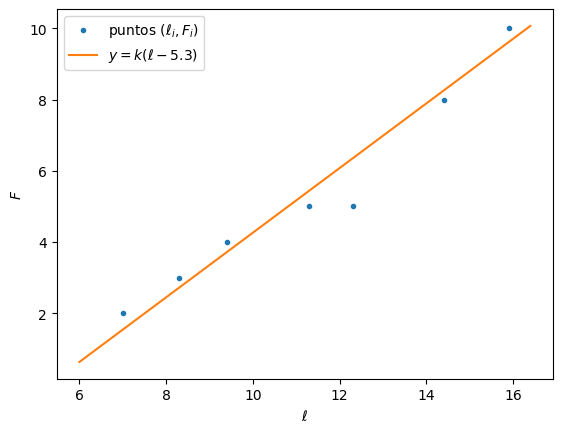

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
F_i=[2,4,5,3,5,8,10]
l_i=[7,9.4,12.3,8.3,11.3,14.4,15.9]
k = 0.907
x_s=np.arange(6,16.5,0.1)

plt.figure()
plt.plot(l_i,F_i,'.', label="puntos $(\ell_i,F_i)$")
plt.plot(x_s, k*(x_s-5.3), label='$y=k(\ell-5.3)$')
plt.xlabel('$\ell$')
plt.ylabel('$F$')
plt.legend()
plt.show()

## Ejercicio 7

Obtener la aproximación lineal en el sentido de los cuadrados mínimos de la función $f$ en el intervalo indicado si:

 (a) $f(x)=x^2+3x+2$ en el intervalo $[0,1]$

 (b) $f(x)=x^2+3x+2$ en el intervalo $[-1,1]$

 (c) $f(x)=e^x$ en el intervalo $[0,2]$



---



**Contexto**

Sea que $f\in C[a,b]$, se desea determinar el mejor polinomio (en el sentido de cuadrados mínimos) $P_n(x)$ de grado menor o igual que $n$ que minimice la siguiente medida del error entre $f$ y $P_n(x)$ en el intervalo $[a,b]$:

$$
E=E(a_0,\dots,a_n)=\int_a^b(f(x)-P_n(x))^2\,dx=∫_a^b(f(x)-\sum_{k=0}^na_kx^k)^2\,dx
$$

es decir, se deben determinar los coeficientes $a_0,\dots,a_n$ que define el polinomio $P_n(x)$ de manera que $E$ sea mínima.

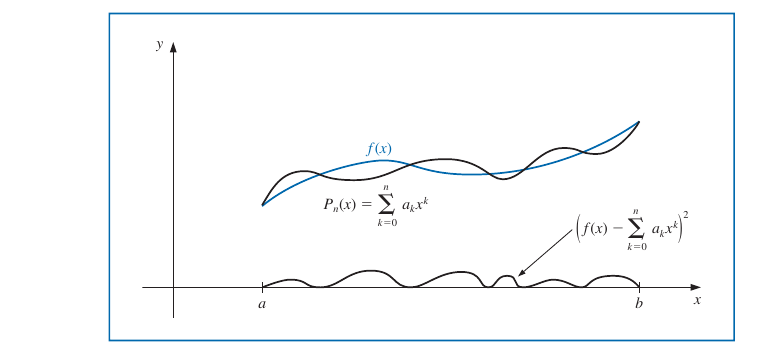

Una condición necesaria para que los números $a_0,a_1,\dots,a_n$ minimicen $E$ es que

$$
\frac{∂E}{∂a_j}=0,\hspace{1cm}\text{para cada}\hspace{0.5cm}j=0,1,\dots,n
$$

Si reescribimos:

\begin{align*}
E&=∫_a^b(f(x)-\sum_{k=0}^na_kx^k)^2\,dx\\
&=\int_{a}^b(f(x))^2dx-2\sum_{k=0}^na_k\int_a^bx^kf(x)dx+\int_a^b\left(\sum_{k=0}^na_kx^k\right)^2dx
\end{align*}

Tenemos:

\begin{align*}
\frac{∂E}{∂a_j}=-2\int_{a}^bx^jf(x)dx+2\sum_{k=0}^na_k\int_a^bx^{k+j}dx=0
\end{align*}

De donde se obtienen las $(n+1)$ **ecuaciones normales**:

$$
\sum_{k=0}^na_k\int_a^bx^{k+j}dx=\int_a^bx^jf(x)\,dx
$$

para $j=0,\dots,n$.



---



**(a)** $f(x)=x^2+3x+2$ en el intervalo $[0,1]$

Se nos pide una aproximación lineal, es decir, encontrar $a_0$ y $a_1$ que minimizan el error

$$
E(a_0,a_1)=\int_a^b(f(x)-P_1(x))^2\,dx=\int_a^b(f(x)-(a_1x+a_0))^2\,dx
$$

Las ecuaciones normales en son:

\begin{align*}
a_0\int_0^1\,dx+a_1\int_0^1x\,dx=\int_0^1(x^2+3x+2)\,dx\\
a_0\int_0^1x\,dx+a_1\int_0^1x^2\,dx=\int_0^1x(x^2+3x+2)\,dx
\end{align*}

Calculando las integrales podemos escribir este sistema lineal:

$$
\begin{pmatrix}
1 & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{3}
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1
\end{pmatrix}=
\begin{pmatrix}
\frac{23}{6}\\ \frac{9}{4}
\end{pmatrix}
$$

que al solucionarlo nos devuelve:

In [ ]:
# @title
import numpy as np
import scipy as sp

# Coeficientes de la matriz (A)
A = np.array([[1, 1/2],
              [1/2, 1/3]])

# Vector de términos independientes (b)
b = np.array([23/6, 9/4])

# Resolver el sistema de ecuaciones
x = sp.linalg.solve(A, b)

print("Solución del sistema:", x)

Solución del sistema: [1.83333333 4.        ]


Con lo cual nuestra aproximación lineal a la función $f$ en el intervalo $[0,1]$ es:

$$
P_1(x)=a_1x+a_0=4x+\frac{11}{6}
$$

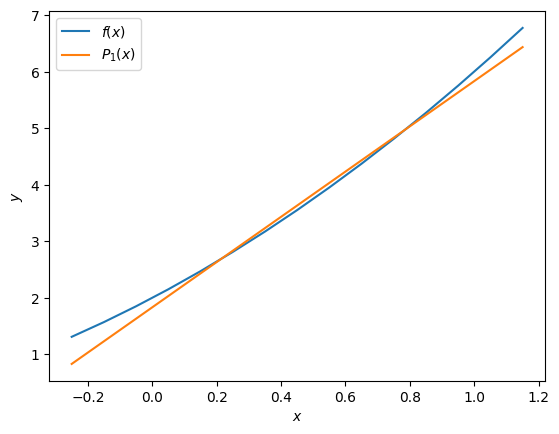

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2+3*x+2

def p(x):
    return 4*x+11/6

x_s=np.arange(-0.25,1.25,0.1)

plt.figure()
plt.plot(x_s, f(x_s), label="$f(x)$")
plt.plot(x_s, p(x_s), label='$P_1(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()



---



**(b)** $f(x)=x^2+3x+2$ en el intervalo $[-1,1]$

En este caso cambian los límites de integración de las ecuaciones normales:


\begin{align*}
a_0\int_{-1}^1\,dx+a_1\int_{-1}^1x\,dx=\int_{-1}^1(x^2+3x+2)\,dx\\
a_0\int_{-1}^1x\,dx+a_1\int_{-1}^1x^2\,dx=\int_{-1}^1x(x^2+3x+2)\,dx
\end{align*}

Al calcular las integrales, obtenemos el sistema:

\begin{cases}
2⋅a_0 + 0\cdot a_1&=\frac{14}{3}\\
0⋅a_0+\frac{2}{3}a_1&=2
\end{cases}

De donde

\begin{align*}
a_0&=\frac{7}{3}\\
a_1&=3
\end{align*}

y asi:

$$
P(x)=3x+\frac{7}{3}
$$

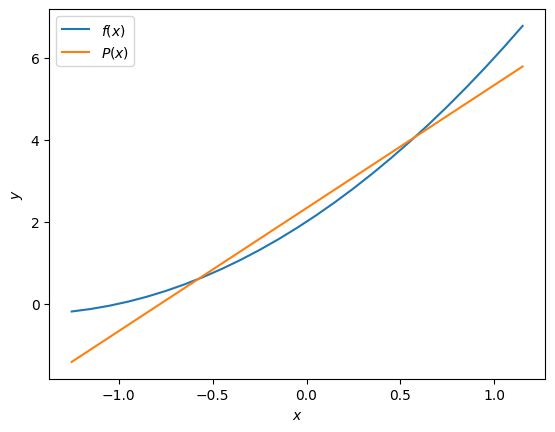

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2+3*x+2

def p(x):
    return 3*x+7/3

x_s=np.arange(-1.25,1.25,0.1)

plt.figure()
plt.plot(x_s, f(x_s), label="$f(x)$")
plt.plot(x_s, p(x_s), label='$P(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()



---



## Ejercicio 8

Aproximar los datos de la siguiente tabla en el sentido de cuadrados mínimos con un
modelo de la forma $f (x) \sim a \cos(x) + b \sin(x)$ .

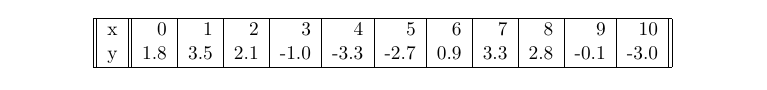